In [ ]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('/content/Loan-Txn-ML-dataset.csv', sep=';', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
0,ZL0206,CF1001,19/04/1973,Teacher,Own,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,270000,810000,5,3400000,1000000,"0,12",Education Loan,Tution Fee
1,ZL0114,CF1748,07/01/1989,Government Employee,Own,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,315000,945000,5,4000000,3000000,"0,1",Personal Loan,Other
2,ZL0339,CF1909,29/05/1980,Engineer,Own,Minbu,Magway,13/05/2022,13/05/2025,"108,00",36,39,90000,270000,5,1200000,1000000,"0,16",Personal Loan,Buying Car
3,ZL0365,CF4892,03/05/2002,Business Owner,Family,Yamethin,Mandalay,13/05/2022,13/05/2025,"108,00",36,39,270000,810000,5,3100000,900000,"0,12",Credit Card Loan,Credit Card
4,ZL0106,CF6175,31/01/1973,Farmer,Family,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,315000,945000,5,3600000,400000,"0,11",Personal Loan,Buying Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZL1255,CF2002,05/09/2003,Nurse,Family,Kyaukme,Shan,4/29/2023,29/07/2025,"31,00",27,28,225000,225000,4,2700000,2300000,"0,13",Agricultural Loan,Agriculture
1996,ZL1040,CF1727,10/06/1996,Student,Family,Taungtha,Mandalay,4/3/2023,03/07/2025,"57,00",27,28,225000,225000,4,3000000,2400000,"0,12",Agricultural Loan,Agriculture
1997,ZL1073,CF0067,08/06/1990,Nurse,Own,Gyobingauk,Bago,4/8/2023,08/07/2025,"52,00",27,28,315000,315000,4,3900000,900000,"0,11",Personal Loan,Wedding
1998,ZL1638,CF3460,16/03/1963,Student,Family,Thabeikkyin,Mandalay,4/9/2023,09/07/2025,"51,00",27,28,315000,315000,4,3800000,1000000,"0,11",Personal Loan,Moving


## Feature Engineering
0. Fully paid
1. Current
2. In Grace Period
3. 16 - 30 days
4. 31 - 90 days
5. Charge off

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   LoanID               2000 non-null   object
 1   CustomerID           2000 non-null   object
 2   DOB                  2000 non-null   object
 3   Occupation           2000 non-null   object
 4   Home Ownership       2000 non-null   object
 5   Township             2000 non-null   object
 6   Region               2000 non-null   object
 7   Issue Date           2000 non-null   object
 8   Expected End Date    2000 non-null   object
 9   Days Overdue         2000 non-null   object
 10  Term Months          2000 non-null   int64 
 11  Current Term Months  2000 non-null   int64 
 12  Installment          2000 non-null   int64 
 13  Outstanding          2000 non-null   int64 
 14  Loan Status          2000 non-null   int64 
 15  Loan Amount          2000 non-null   int64 
 16  Funded

## Cek Missing Value

In [ ]:
df.isna().sum()

,0
LoanID,0
CustomerID,0
DOB,0
Occupation,0
Home Ownership,0
Township,0
Region,0
Issue Date,0
Expected End Date,0
Days Overdue,0


<Axes: >

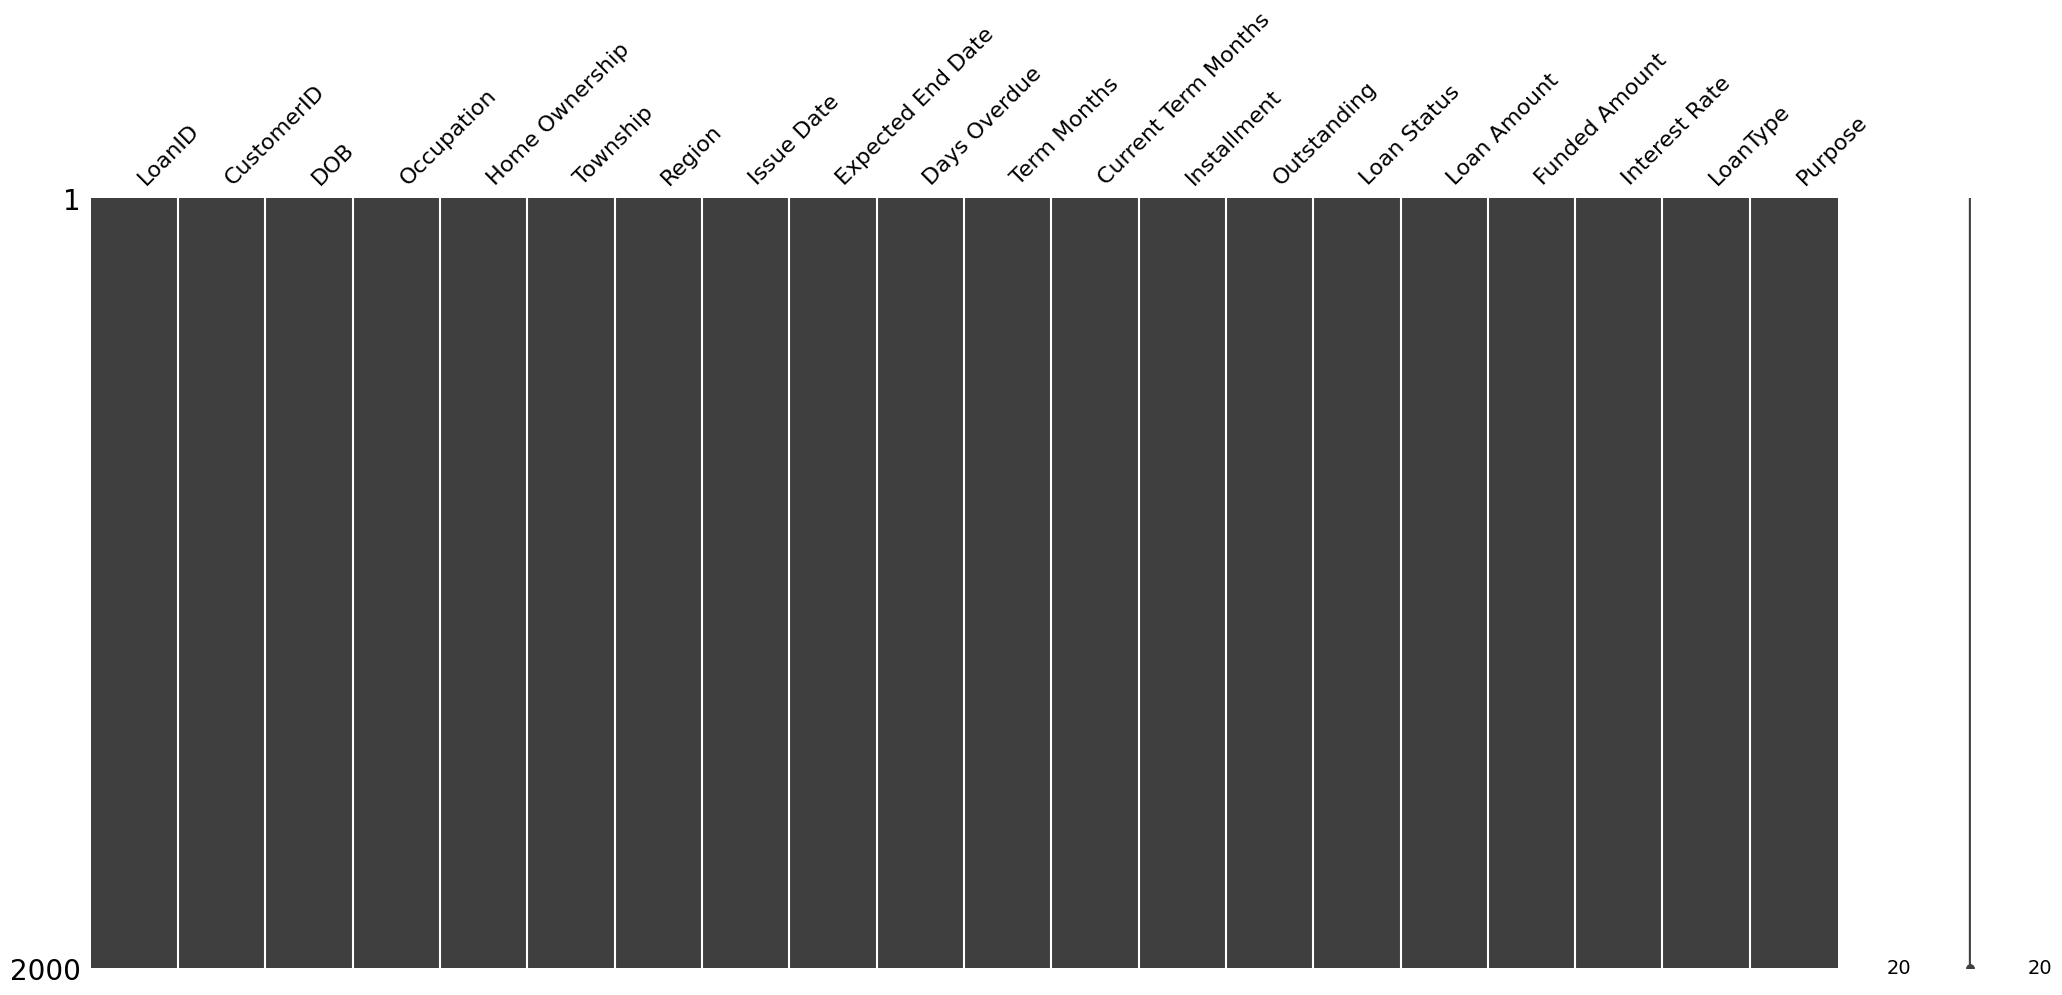

In [ ]:
import missingno as msno
msno.matrix(df)

## Cek Data Duplikat

In [ ]:
df.duplicated(subset=None, keep='first').all()

np.False_

## Uji Korelasi

In [ ]:
# Mengganti koma dengan titik dalam kolom 'Interest Rate'
df['Interest Rate'] = df['Interest Rate'].str.replace(',', '.', regex=False)
df['Interest Rate'] = df['Interest Rate'].astype(float)
print(df.dtypes)

LoanID                  object
CustomerID              object
DOB                     object
Occupation              object
Home Ownership          object
Township                object
Region                  object
Issue Date              object
Expected End Date       object
Days Overdue            object
Term Months              int64
Current Term Months      int64
Installment              int64
Outstanding              int64
Loan Status              int64
Loan Amount              int64
Funded Amount            int64
Interest Rate          float64
LoanType                object
Purpose                 object
dtype: object


In [ ]:
# Mengganti koma dengan titik dalam kolom 'Days Overdue'
df['Days Overdue'] = df['Days Overdue'].str.replace(',', '.', regex=False)
df['Days Overdue'] = df['Days Overdue'].astype(float)
print(df.dtypes)

LoanID                  object
CustomerID              object
DOB                     object
Occupation              object
Home Ownership          object
Township                object
Region                  object
Issue Date              object
Expected End Date       object
Days Overdue           float64
Term Months              int64
Current Term Months      int64
Installment              int64
Outstanding              int64
Loan Status              int64
Loan Amount              int64
Funded Amount            int64
Interest Rate          float64
LoanType                object
Purpose                 object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LoanID               2000 non-null   object 
 1   CustomerID           2000 non-null   object 
 2   DOB                  2000 non-null   object 
 3   Occupation           2000 non-null   object 
 4   Home Ownership       2000 non-null   object 
 5   Township             2000 non-null   object 
 6   Region               2000 non-null   object 
 7   Issue Date           2000 non-null   object 
 8   Expected End Date    2000 non-null   object 
 9   Days Overdue         2000 non-null   float64
 10  Term Months          2000 non-null   int64  
 11  Current Term Months  2000 non-null   int64  
 12  Installment          2000 non-null   int64  
 13  Outstanding          2000 non-null   int64  
 14  Loan Status          2000 non-null   int64  
 15  Loan Amount          2000 non-null   i

In [ ]:
korelasi = df[['Term Months', 'Current Term Months','Days Overdue', 'Installment', 'Outstanding', 'Loan Status', 'Loan Amount', 'Funded Amount', 'Interest Rate']]
# Menghitung korelasi
correlation = korelasi.corr()
correlation

,Term Months,Current Term Months,Days Overdue,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate
Term Months,1.000000,0.256722,-0.362966,0.000494,0.316412,-0.316044,-0.003581,0.017032,0.007499
Current Term Months,0.256722,1.000000,0.806693,0.015775,-0.722523,0.496447,0.012708,0.017362,-0.007621
Days Overdue,-0.362966,0.806693,1.000000,0.014443,-0.889276,0.669782,0.013956,0.006109,-0.011501
Installment,0.000494,0.015775,0.014443,1.000000,0.272417,0.029015,0.987782,0.498623,-0.960940
Outstanding,0.316412,-0.722523,-0.889276,0.272417,1.000000,-0.496520,0.268697,0.128202,-0.260631
Loan Status,-0.316044,0.496447,0.669782,0.029015,-0.496520,1.000000,0.028004,-0.006035,-0.025866
Loan Amount,-0.003581,0.012708,0.013956,0.987782,0.268697,0.028004,1.000000,0.502837,-0.976908
Funded Amount,0.017032,0.017362,0.006109,0.498623,0.128202,-0.006035,0.502837,1.000000,-0.493730
Interest Rate,0.007499,-0.007621,-0.011501,-0.960940,-0.260631,-0.025866,-0.976908,-0.493730,1.000000


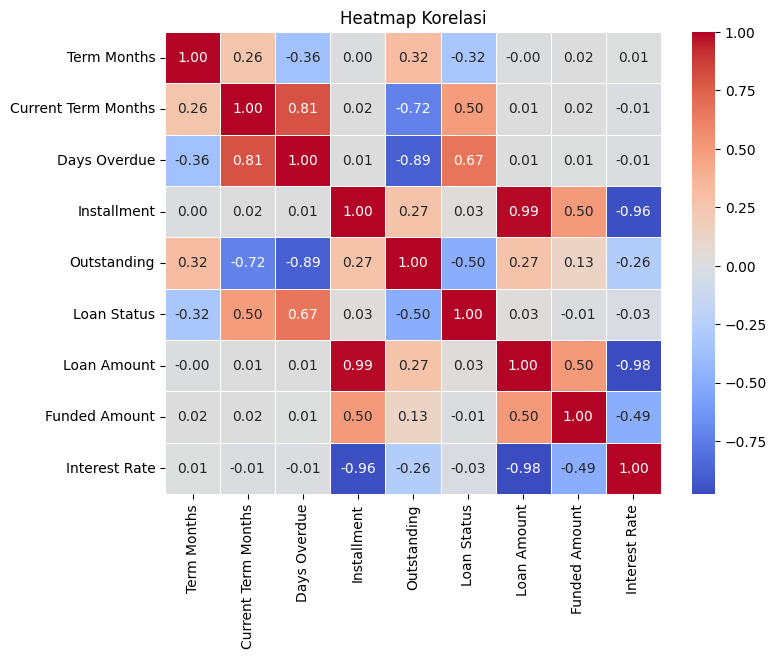

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

## Rata-rata Outstanding dari tiap Loan Status

Mean Outstanding per Loan Status    loan_status  mean_outstanding
0            1      3.233848e+06
1            5      7.053396e+05
2            4      3.614130e+05
3            2      2.274050e+05
4            3      2.182053e+05
5            0      0.000000e+00


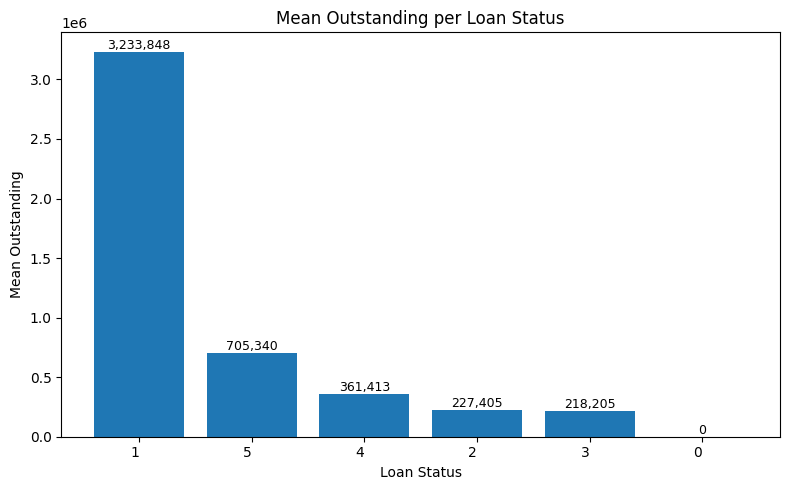

In [ ]:
def _normalize_cols(cols):
    return (
        cols.astype(str)
            .str.strip()
            .str.replace(r"\s+", "_", regex=True)
            .str.replace(r"[^\w_]", "", regex=True)
            .str.lower()
    )
df.columns = _normalize_cols(pd.Index(df.columns))

def _find_column(df, candidates):
    cols = {c: c for c in df.columns}
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand in cols:
            return cand
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    raise KeyError(f"None of the candidates {candidates} found in df.columns={list(df.columns)[:10]} ...")


# Resolve column names (adjust candidates if schema differs)
col_status = _find_column(df, ["loan_status", "status", "loanstatus", "loan_status_code"])
col_outstanding = _find_column(df, ["outstanding", "outstanding_amount", "remaining_principal", "balance"])

# Ensure numeric for outstanding
df[col_outstanding] = pd.to_numeric(df[col_outstanding], errors="coerce")

# Group & compute mean outstanding per loan status
grp = (
    df.groupby(col_status, dropna=False)[col_outstanding]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={col_status: "loan_status", col_outstanding: "mean_outstanding"})
)

# Show the summary table
print("Mean Outstanding per Loan Status", grp)

# Plot a bar chart (categorical x, mean y)
plt.figure(figsize=(8, 5))
plt.bar(grp["loan_status"].astype(str), grp["mean_outstanding"].values)
plt.title("Mean Outstanding per Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Mean Outstanding")
plt.xticks(rotation=0, ha="right")

# Add value labels
for i, v in enumerate(grp["mean_outstanding"].values):
    plt.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('/content/Loan-Txn-ML-dataset.csv', sep=';', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

,LoanID,CustomerID,DOB,Occupation,Home Ownership,Township,Region,Issue Date,Expected End Date,Days Overdue,Term Months,Current Term Months,Installment,Outstanding,Loan Status,Loan Amount,Funded Amount,Interest Rate,LoanType,Purpose
0,ZL0206,CF1001,19/04/1973,Teacher,Own,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,270000,810000,5,3400000,1000000,"0,12",Education Loan,Tution Fee
1,ZL0114,CF1748,07/01/1989,Government Employee,Own,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,315000,945000,5,4000000,3000000,"0,1",Personal Loan,Other
2,ZL0339,CF1909,29/05/1980,Engineer,Own,Minbu,Magway,13/05/2022,13/05/2025,"108,00",36,39,90000,270000,5,1200000,1000000,"0,16",Personal Loan,Buying Car
3,ZL0365,CF4892,03/05/2002,Business Owner,Family,Yamethin,Mandalay,13/05/2022,13/05/2025,"108,00",36,39,270000,810000,5,3100000,900000,"0,12",Credit Card Loan,Credit Card
4,ZL0106,CF6175,31/01/1973,Farmer,Family,Bago,Bago,13/05/2022,13/05/2025,"108,00",36,39,315000,945000,5,3600000,400000,"0,11",Personal Loan,Buying Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZL1255,CF2002,05/09/2003,Nurse,Family,Kyaukme,Shan,4/29/2023,29/07/2025,"31,00",27,28,225000,225000,4,2700000,2300000,"0,13",Agricultural Loan,Agriculture
1996,ZL1040,CF1727,10/06/1996,Student,Family,Taungtha,Mandalay,4/3/2023,03/07/2025,"57,00",27,28,225000,225000,4,3000000,2400000,"0,12",Agricultural Loan,Agriculture
1997,ZL1073,CF0067,08/06/1990,Nurse,Own,Gyobingauk,Bago,4/8/2023,08/07/2025,"52,00",27,28,315000,315000,4,3900000,900000,"0,11",Personal Loan,Wedding
1998,ZL1638,CF3460,16/03/1963,Student,Family,Thabeikkyin,Mandalay,4/9/2023,09/07/2025,"51,00",27,28,315000,315000,4,3800000,1000000,"0,11",Personal Loan,Moving


# Rincian Loan Status dari Occupation, Loan Type, dan Purpose

## Rincian Loan Status 1 (Current)

Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 1:
             Occupation  transaction_count
9               Student                125
3                Farmer                116
0        Business Owner                114
5   Government Employee                114
10              Teacher                113


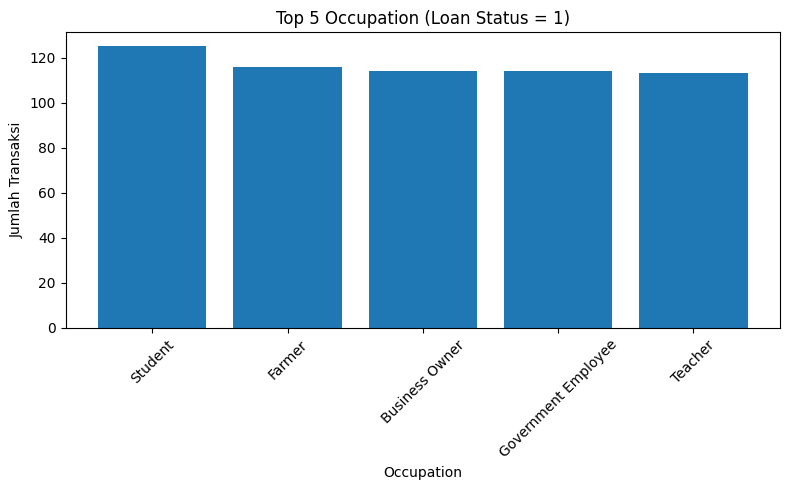

In [ ]:
# Filter hanya Loan Status = 1
df_status1 = df[df['Loan Status'] == 1]

# Hitung jumlah transaksi per Occupation
top5_occ = (
    df_status1.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 1:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Occupation'], top5_occ['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 1)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 1:
                  LoanType  transaction_count
0        Agricultural Loan                568
4            Personal Loan                190
2  Health & Emergency Loan                 51
3    Home Improvement Loan                 38
1           Education Loan                 37


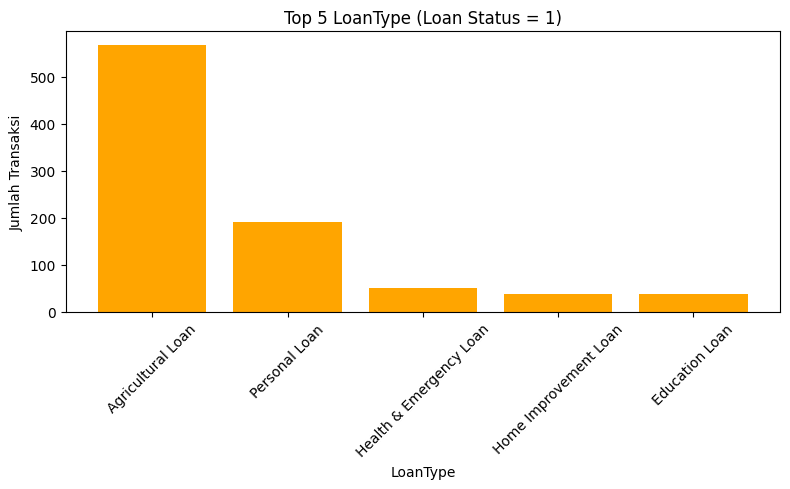

In [ ]:
# Filter hanya Loan Status = 1
df_status1 = df[df['Loan Status'] == 1]

# Hitung jumlah transaksi per LoanType
top5_occ = (
    df_status1.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 1:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['LoanType'], top5_occ['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 1)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 1:
              Purpose  transaction_count
0         Agriculture                568
3  Debt Consolidation                 70
7               Other                 56
6              Moving                 55
4              Health                 51


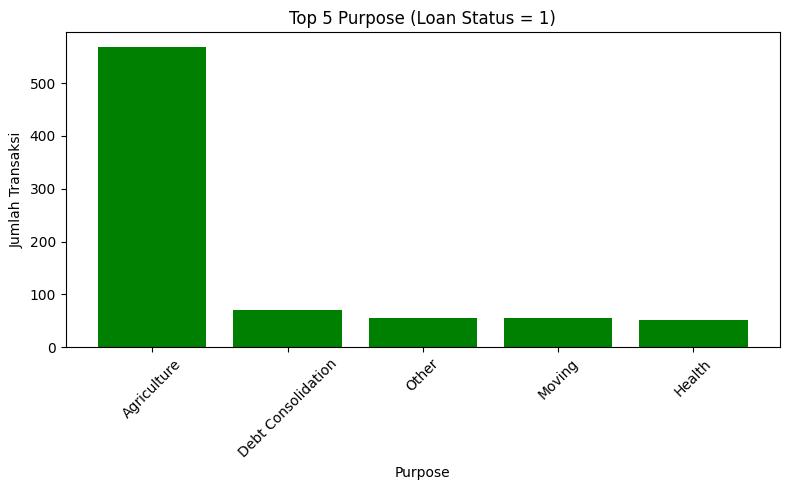

In [ ]:
# Filter hanya Loan Status = 1
df_status1 = df[df['Loan Status'] == 1]

# Hitung jumlah transaksi per Purpose
top5_occ = (
    df_status1.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 1:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Purpose'], top5_occ['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 1)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rincian Loan Status 2 (In Grace Period)

Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 2:
            Occupation  transaction_count
3               Farmer                 69
9              Teacher                 67
5  Government Employee                 61
8              Student                 58
4           Freelancer                 55


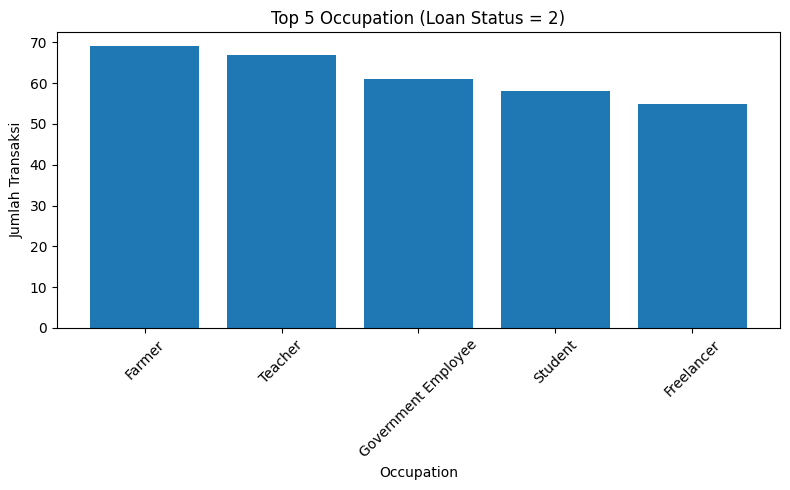

In [ ]:
# Filter hanya Loan Status = 2
df_status1 = df[df['Loan Status'] == 2]

# Hitung jumlah transaksi per Occupation
top5_occ = (
    df_status1.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 2:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Occupation'], top5_occ['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 2)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 2:
                LoanType  transaction_count
6          Personal Loan                221
4     Hire Purchase Loan                 53
2         Education Loan                 49
5  Home Improvement Loan                 41
7               SME Loan                 40


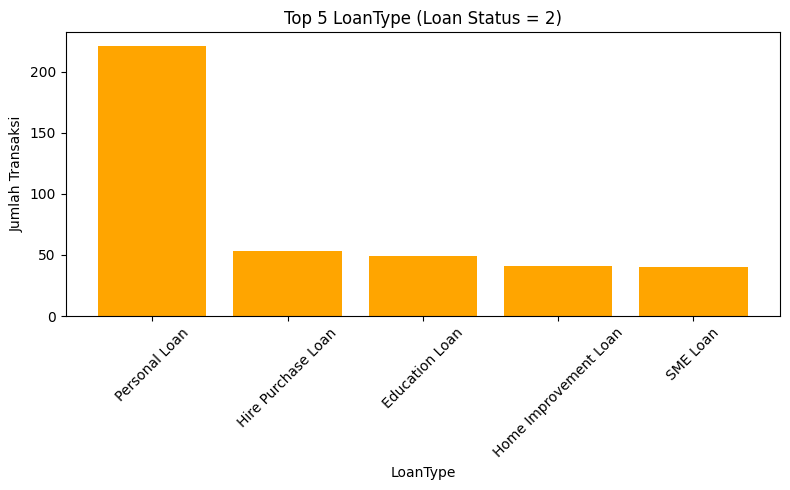

In [ ]:
# Filter hanya Loan Status = 2
df_status1 = df[df['Loan Status'] == 2]

# Hitung jumlah transaksi per LoanType
top5_occ = (
    df_status1.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 2:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['LoanType'], top5_occ['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 2)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 1:
               Purpose  transaction_count
8       Major Purchase                 53
11          Tution Fee                 49
2           Buying Car                 46
5   Debt Consolidation                 44
12            Vacation                 42


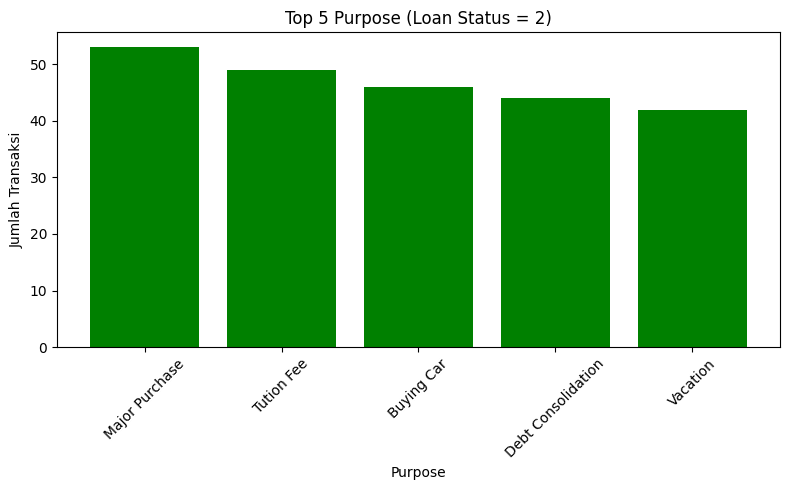

In [ ]:
# Filter hanya Loan Status = 2
df_status1 = df[df['Loan Status'] == 2]

# Hitung jumlah transaksi per Purpose
top5_occ = (
    df_status1.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 1:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Purpose'], top5_occ['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 2)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rincian Loan Status 3 (16-30 Days)

Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 5:
                 Occupation  transaction_count
8                   Student                 20
4                Freelancer                 20
7  Private Company Employee                 19
3                    Farmer                 19
9                   Teacher                 18


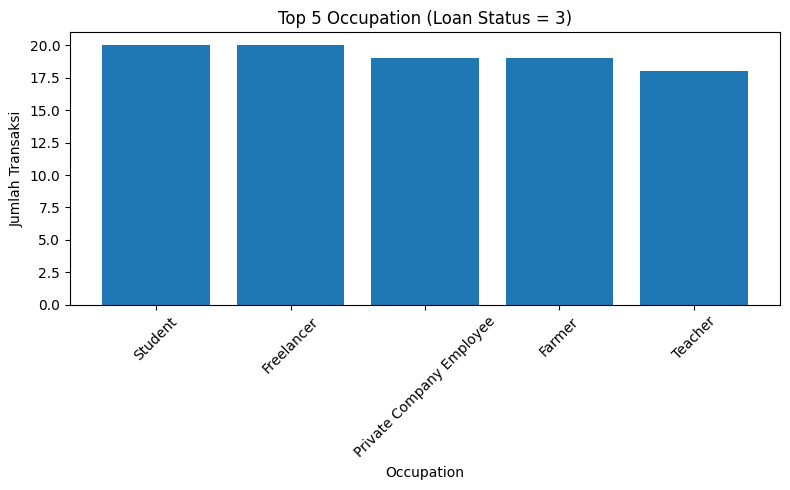

In [ ]:
# Filter hanya Loan Status = 3
df_status5 = df[df['Loan Status'] == 3]

# Hitung jumlah transaksi per Occupation
top5_occ = (
    df_status5.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Occupation'], top5_occ['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 3)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 5:
                  LoanType  transaction_count
6            Personal Loan                 72
5    Home Improvement Loan                 19
3  Health & Emergency Loan                 16
4       Hire Purchase Loan                 10
2           Education Loan                  9


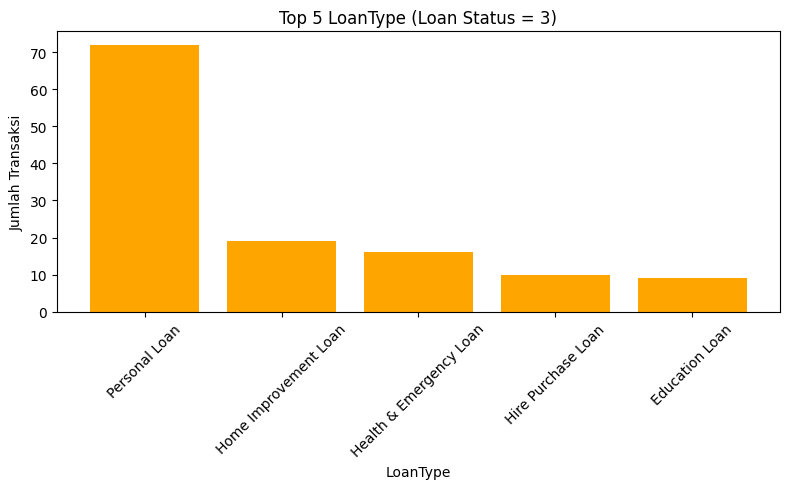

In [ ]:
# Filter hanya Loan Status = 3
df_status5 = df[df['Loan Status'] == 3]

# Hitung jumlah transaksi per LoanType
top5_occ = (
    df_status5.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['LoanType'], top5_occ['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 3)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 5:
               Purpose  transaction_count
7            Household                 19
6               Health                 16
9               Moving                 16
5   Debt Consolidation                 14
12            Vacation                 12


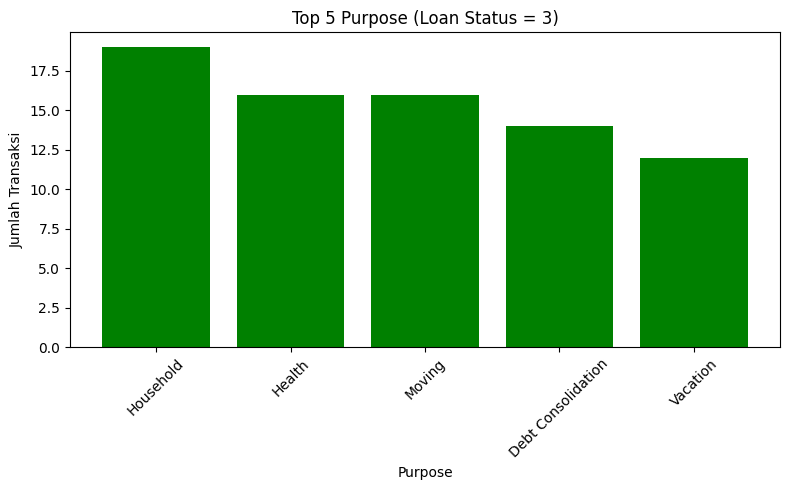

In [ ]:
# Filter hanya Loan Status = 3
df_status5 = df[df['Loan Status'] == 3]

# Hitung jumlah transaksi per Purpose
top5_occ = (
    df_status5.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Purpose'], top5_occ['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 3)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rincian Loan Status 4 (31-90 Days)

Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 4:
                 Occupation  transaction_count
3                    Farmer                 46
5       Government Employee                 43
8                   Student                 42
7  Private Company Employee                 40
9                   Teacher                 28


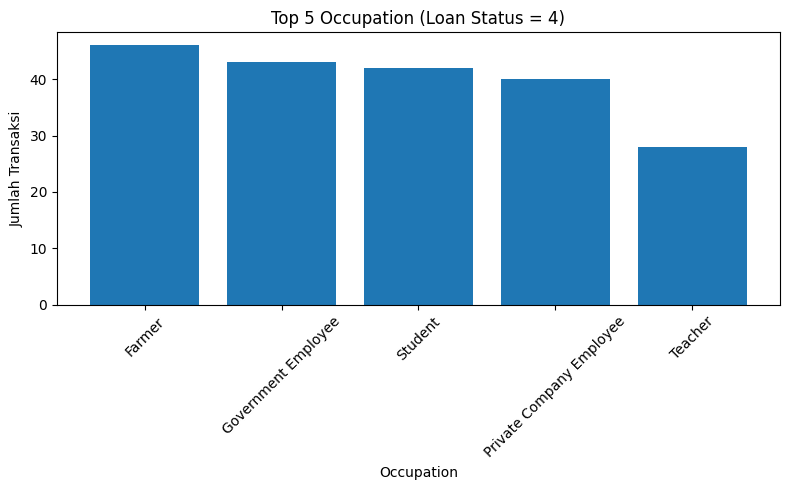

In [ ]:
# Filter hanya Loan Status = 4
df_status5 = df[df['Loan Status'] == 4]

# Hitung jumlah transaksi per Occupation
top5_occ = (
    df_status5.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 4:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Occupation'], top5_occ['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 4)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 4:
                  LoanType  transaction_count
6            Personal Loan                127
3  Health & Emergency Loan                 37
0        Agricultural Loan                 28
2           Education Loan                 24
4       Hire Purchase Loan                 24


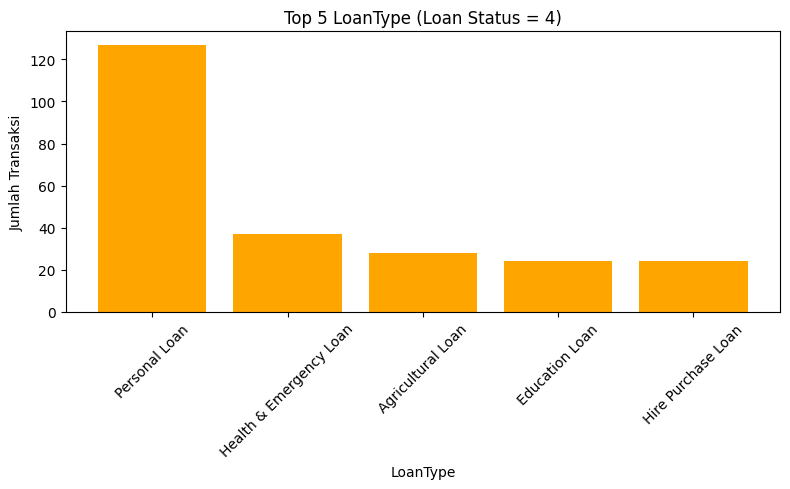

In [ ]:
# Filter hanya Loan Status = 4
df_status5 = df[df['Loan Status'] == 4]

# Hitung jumlah transaksi per LoanType
top5_occ = (
    df_status5.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 4:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['LoanType'], top5_occ['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 4)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 4:
           Purpose  transaction_count
6           Health                 37
0      Agriculture                 28
2       Buying Car                 28
8   Major Purchase                 24
11      Tution Fee                 24


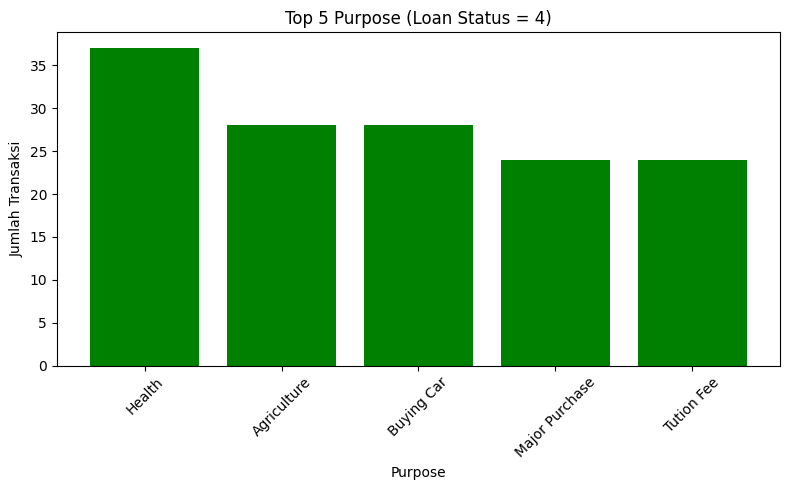

In [ ]:
# Filter hanya Loan Status = 4
df_status5 = df[df['Loan Status'] == 4]

# Hitung jumlah transaksi per Purpose
top5_occ = (
    df_status5.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 4:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Purpose'], top5_occ['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 4)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rincian Loan Status 5 (Charge Off)

Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 5:
            Occupation  transaction_count
3               Farmer                 28
8              Student                 25
5  Government Employee                 22
4           Freelancer                 22
9              Teacher                 15


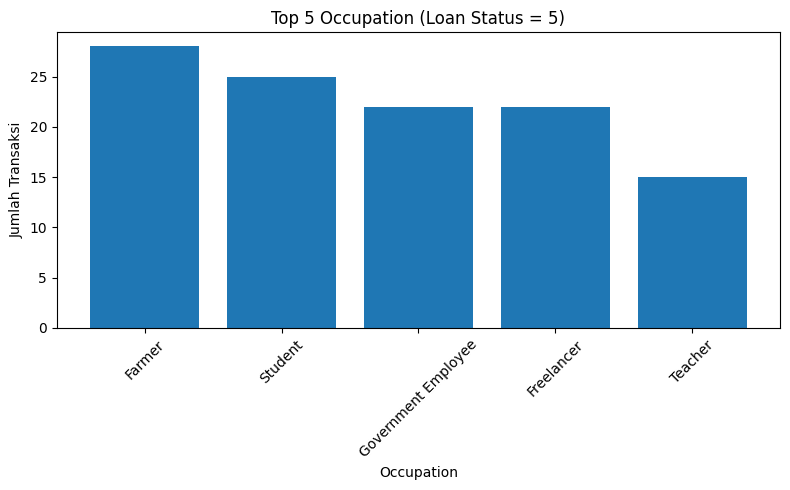

In [ ]:
# Filter hanya Loan Status = 5
df_status5 = df[df['Loan Status'] == 5]

# Hitung jumlah transaksi per Occupation
top5_occ = (
    df_status5.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Occupation'], top5_occ['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 5)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 5:
                LoanType  transaction_count
6          Personal Loan                 79
7               SME Loan                 15
5  Home Improvement Loan                 14
0      Agricultural Loan                 12
4     Hire Purchase Loan                 11


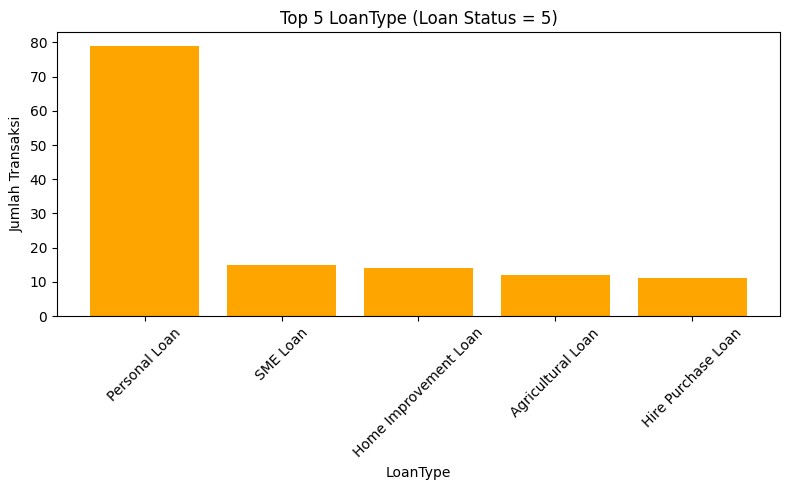

In [ ]:
# Filter hanya Loan Status = 5
df_status5 = df[df['Loan Status'] == 5]

# Hitung jumlah transaksi per LoanType
top5_occ = (
    df_status5.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['LoanType'], top5_occ['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 5)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 5:
              Purpose  transaction_count
2          Buying Car                 16
1            Business                 15
5  Debt Consolidation                 15
3        Buying House                 15
7           Household                 14


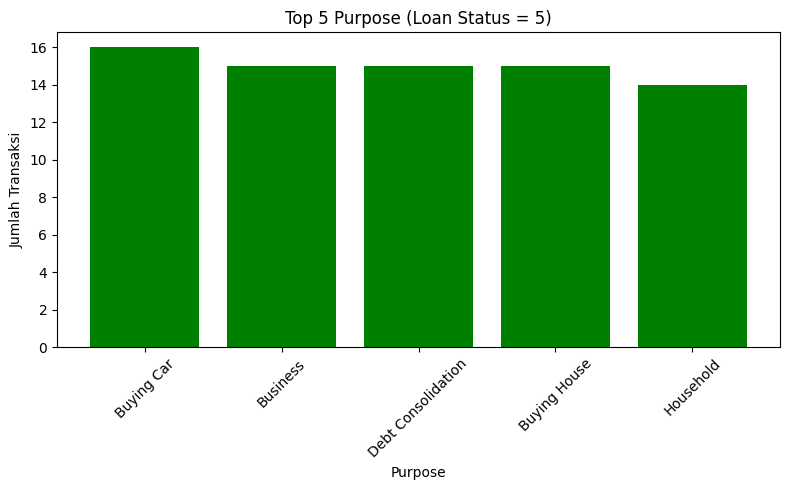

In [ ]:
# Filter hanya Loan Status = 5
df_status5 = df[df['Loan Status'] == 5]

# Hitung jumlah transaksi per Purpose
top5_occ = (
    df_status5.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak untuk Loan Status = 5:")
print(top5_occ)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ['Purpose'], top5_occ['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 5)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Gabungan Loan Status 3,4,5 (yang bermasalah) berdasarkan occupation, loantype, dan purpose

Top 5 Occupation dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):
                 Occupation  transaction_count
3                    Farmer                 93
8                   Student                 87
5       Government Employee                 80
7  Private Company Employee                 72
4                Freelancer                 70


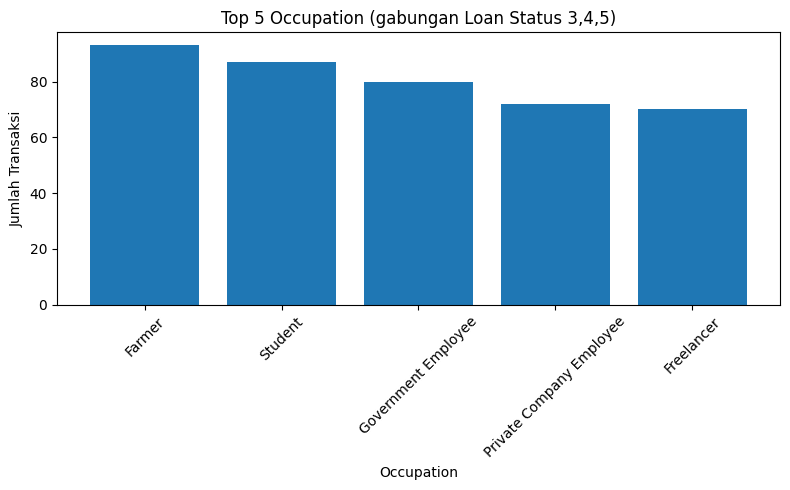

In [ ]:
# Filter hanya Loan Status = 3,4,5
df_status345 = df[df['Loan Status'].isin([3, 4, 5])]

# Hitung jumlah transaksi per Occupation (gabungan 3,4,5)
top5_occ_345 = (
    df_status345.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):")
print(top5_occ_345)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_345['Occupation'], top5_occ_345['transaction_count'])
plt.title("Top 5 Occupation (gabungan Loan Status 3,4,5)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):
                  LoanType  transaction_count
6            Personal Loan                278
3  Health & Emergency Loan                 63
5    Home Improvement Loan                 55
0        Agricultural Loan                 48
4       Hire Purchase Loan                 45


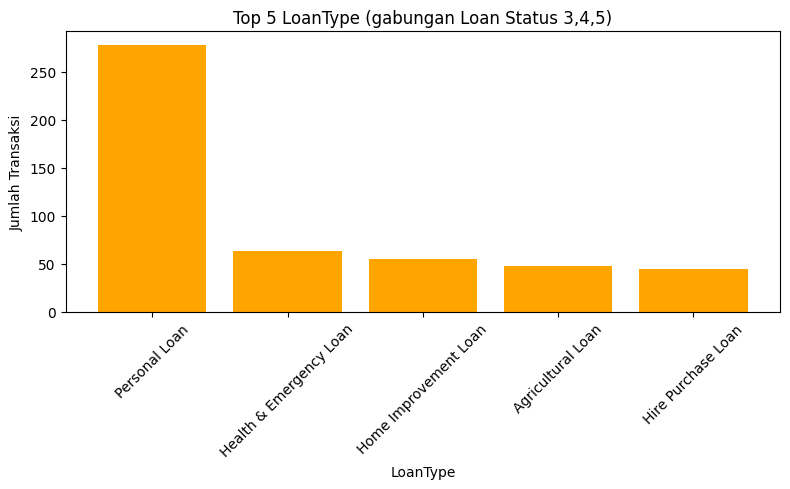

In [ ]:
# Filter hanya Loan Status = 3,4,5
df_status345 = df[df['Loan Status'].isin([3, 4, 5])]

# Hitung jumlah transaksi per LoanType (gabungan 3,4,5)
top5_occ_345 = (
    df_status345.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):")
print(top5_occ_345)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_345['LoanType'], top5_occ_345['transaction_count'], color='orange')
plt.title("Top 5 LoanType (gabungan Loan Status 3,4,5)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):
       Purpose  transaction_count
6       Health                 63
2   Buying Car                 55
7    Household                 55
9       Moving                 50
0  Agriculture                 48


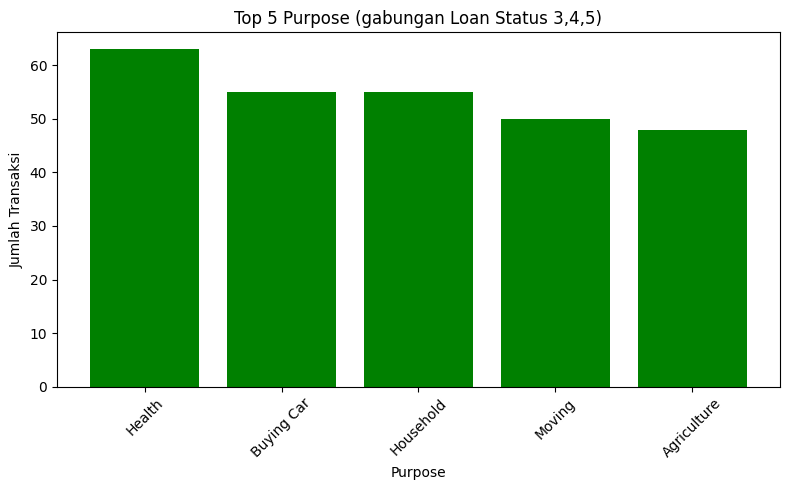

In [ ]:
# Filter hanya Loan Status = 3,4,5
df_status345 = df[df['Loan Status'].isin([3, 4, 5])]

# Hitung jumlah transaksi per Purpose (gabungan 3,4,5)
top5_occ_345 = (
    df_status345.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):")
print(top5_occ_345)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_345['Purpose'], top5_occ_345['transaction_count'], color='green')
plt.title("Top 5 Purpose (gabungan Loan Status 3,4,5)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Segmen Rawan: Default Rate vs Outstanding

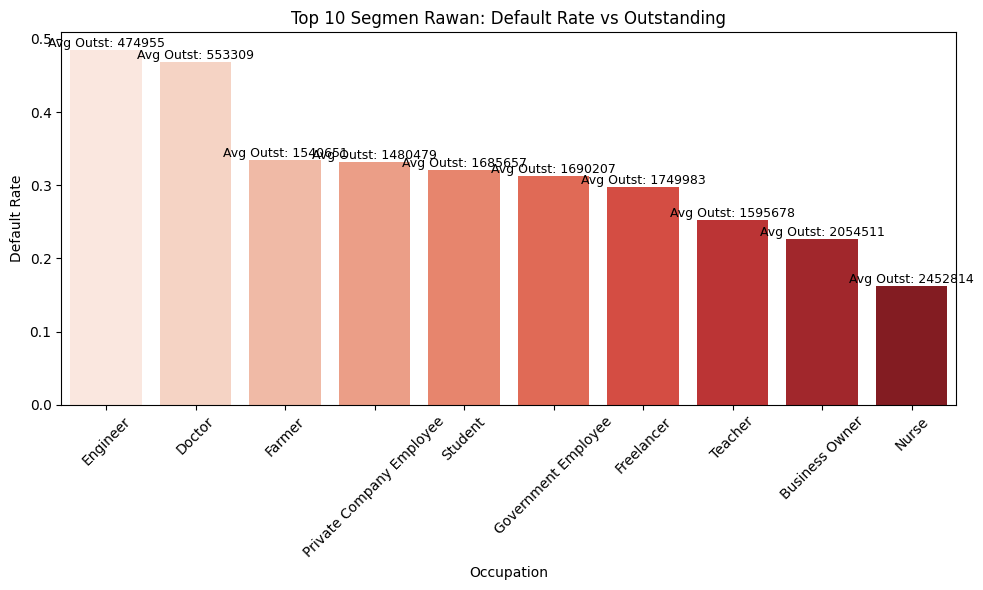

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil top 10 segmen rawan
top_risky = risky_small_seg.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_risky,
    x="Occupation",
    y="default_rate",
    hue="Occupation",
    dodge=False,  # supaya tidak double bar
    palette="Reds"
)

plt.title("Top 10 Segmen Rawan: Default Rate vs Outstanding")
plt.xlabel("Occupation")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)

# Tambahin label avg_outstanding di atas bar
for i, row in top_risky.iterrows():
    plt.text(
        x=list(top_risky.index).index(i),
        y=row["default_rate"],
        s=f"Avg Outst: {row['avg_outstanding']:.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


# Persebaran Outstanding vs Loan Amount

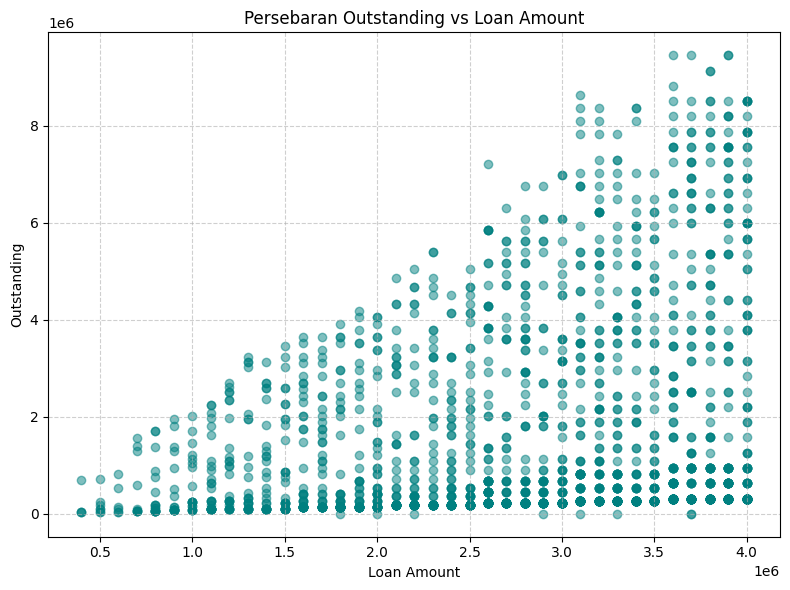

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["Loan Amount"], df["Outstanding"], alpha=0.5, color="teal")

plt.title("Persebaran Outstanding vs Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Outstanding")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Top 5 Region dengan Loan Status yg bermasalah

Top 5 Region dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):
     Region  transaction_count
1    Magway                190
0      Bago                130
2  Mandalay                114
3   Sagaing                 83
5    Yangon                 68


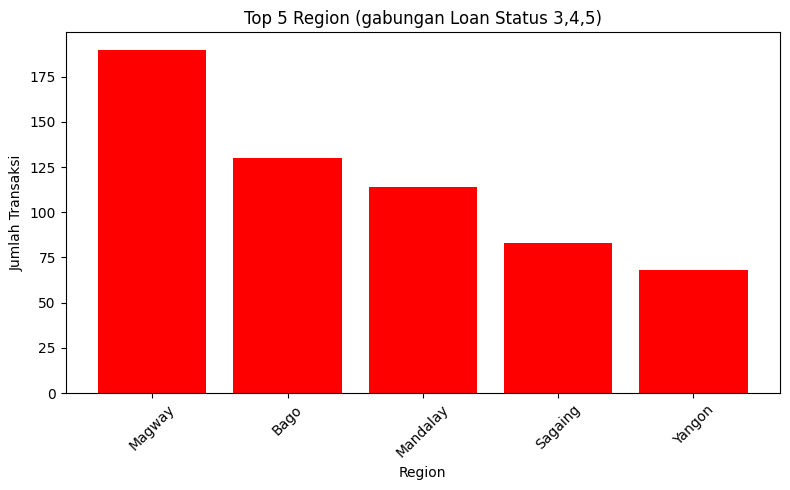

In [ ]:
# Filter hanya Loan Status = 3,4,5
df_status345 = df[df['Loan Status'].isin([3, 4, 5])]

# Hitung jumlah transaksi per Region (gabungan 3,4,5)
top5_occ_345 = (
    df_status345.groupby('Region')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Region dengan jumlah transaksi terbanyak (gabungan Loan Status 3,4,5):")
print(top5_occ_345)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_345['Region'], top5_occ_345['transaction_count'], color='red')
plt.title("Top 5 Region (gabungan Loan Status 3,4,5)")
plt.xlabel("Region")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Total Loan Status 3,4,5 (yang bermasalah) by occupation, loantype, dan purpose di region magway

Top 5 Occupation (Loan Status = 3,4,5, Region = Magway):
                 Occupation  transaction_count
7  Private Company Employee                 27
5       Government Employee                 27
8                   Student                 26
3                    Farmer                 22
4                Freelancer                 20


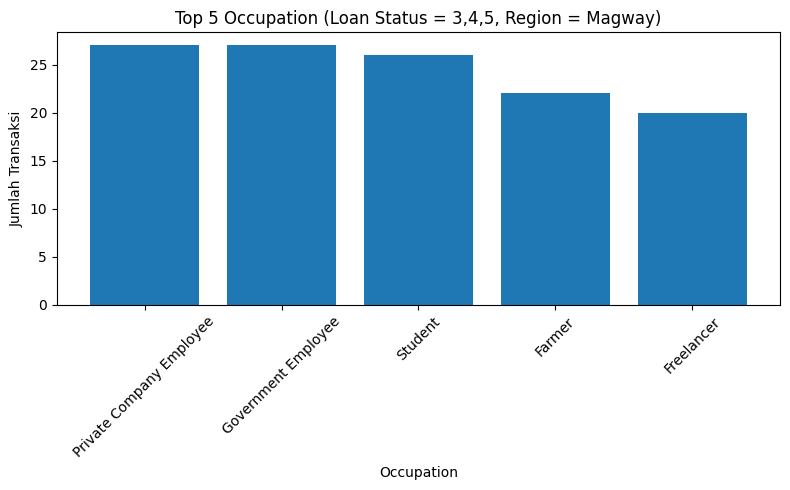

In [ ]:
# Filter data untuk Loan Status = 3,4,5 dan Region = 'Magway'
df_status345_magway = df[(df['Loan Status'].isin([3,4,5])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per Occupation
top5_occ_status345_magway = (
    df_status345_magway.groupby('Occupation')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Occupation (Loan Status = 3,4,5, Region = Magway):")
print(top5_occ_status345_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status345_magway['Occupation'], top5_occ_status345_magway['transaction_count'])
plt.title("Top 5 Occupation (Loan Status = 3,4,5, Region = Magway)")
plt.xlabel("Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 LoanType (Loan Status = 3,4,5, Region = Magway):
                  LoanType  transaction_count
6            Personal Loan                 89
3  Health & Emergency Loan                 23
5    Home Improvement Loan                 17
2           Education Loan                 15
4       Hire Purchase Loan                 15


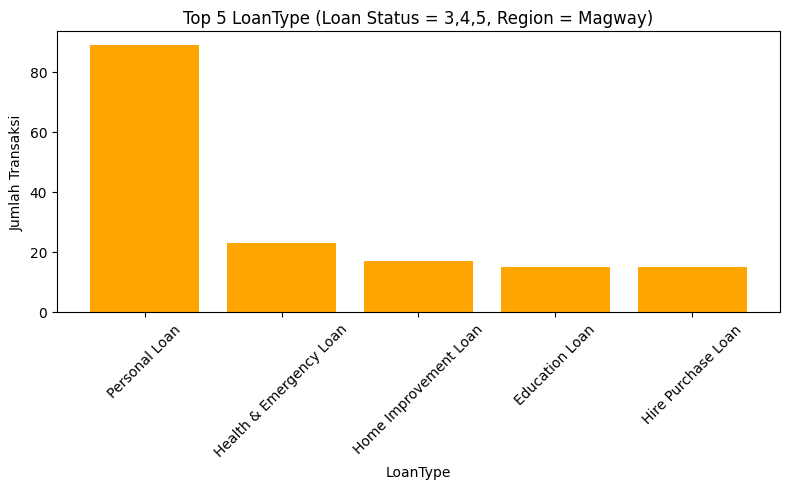

In [ ]:
# Filter data untuk Loan Status = 3,4,5 dan Region = 'Magway'
df_status345_magway = df[(df['Loan Status'].isin([3,4,5])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per LoanType
top5_occ_status345_magway = (
    df_status345_magway.groupby('LoanType')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 LoanType (Loan Status = 3,4,5, Region = Magway):")
print(top5_occ_status345_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status345_magway['LoanType'], top5_occ_status345_magway['transaction_count'], color='orange')
plt.title("Top 5 LoanType (Loan Status = 3,4,5, Region = Magway)")
plt.xlabel("LoanType")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose (Loan Status = 3,4,5, Region = Magway):
              Purpose  transaction_count
6              Health                 23
2          Buying Car                 18
7           Household                 17
5  Debt Consolidation                 17
1            Business                 15


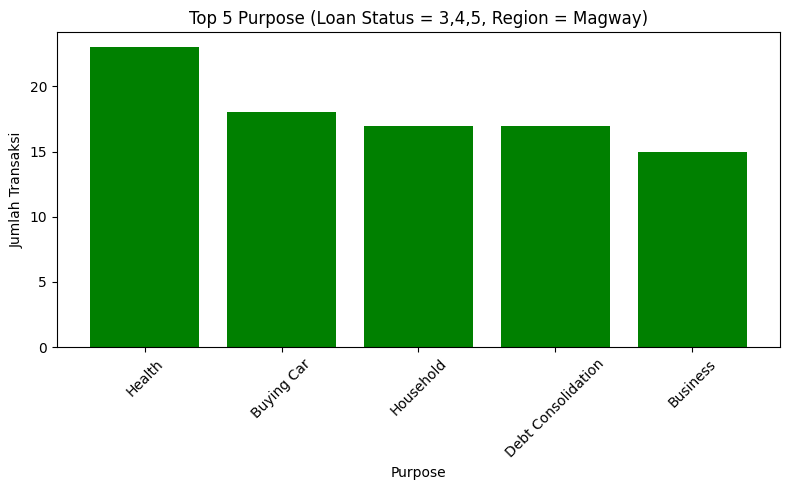

In [ ]:
# Filter data untuk Loan Status = 3,4,5 dan Region = 'Magway'
df_status345_magway = df[(df['Loan Status'].isin([3,4,5])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per Purpose
top5_occ_status345_magway = (
    df_status345_magway.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose (Loan Status = 3,4,5, Region = Magway):")
print(top5_occ_status345_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status345_magway['Purpose'], top5_occ_status345_magway['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 3,4,5, Region = Magway)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rincian total Loan Status (yang bermasalah) by Purpose in region magway

Top 5 Purpose (Loan Status = 3, Region = Magway):
              Purpose  transaction_count
7           Household                  7
8      Major Purchase                  5
2          Buying Car                  5
5  Debt Consolidation                  4
6              Health                  4


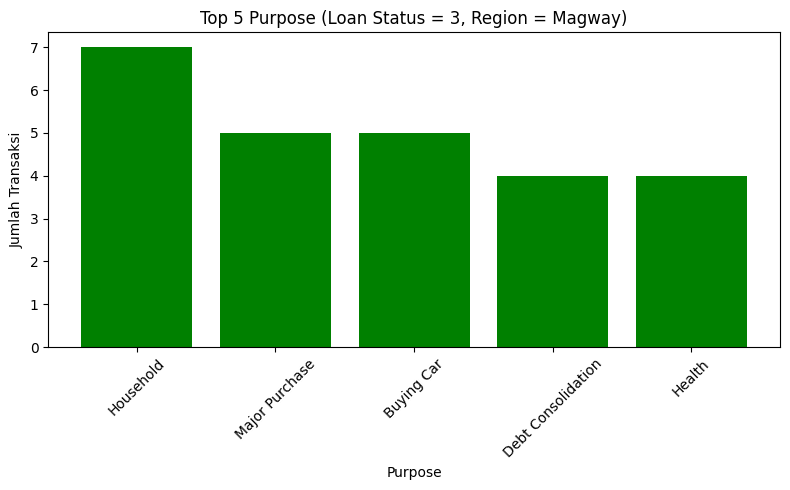

In [ ]:
# Filter data untuk Loan Status = 3 dan Region = 'Magway'
df_status345_magway = df[(df['Loan Status'].isin([3])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per Purpose
top5_occ_status345_magway = (
    df_status345_magway.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose (Loan Status = 3, Region = Magway):")
print(top5_occ_status345_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status345_magway['Purpose'], top5_occ_status345_magway['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 3, Region = Magway)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose (Loan Status = 4, Region = Magway):
         Purpose  transaction_count
6         Health                 14
11    Tution Fee                 10
2     Buying Car                  9
3   Buying House                  7
7      Household                  7


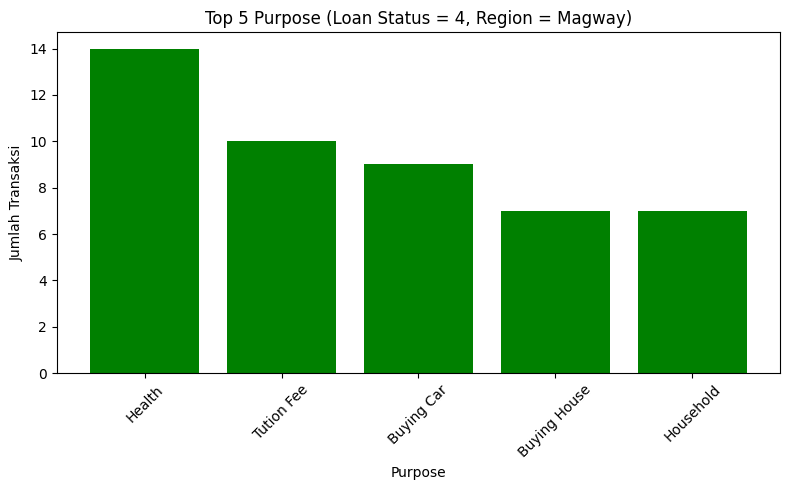

In [ ]:
# Filter data untuk Loan Status = 4 dan Region = 'Magway'
df_status445_magway = df[(df['Loan Status'].isin([4])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per Purpose
top5_occ_status445_magway = (
    df_status445_magway.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose (Loan Status = 4, Region = Magway):")
print(top5_occ_status445_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status445_magway['Purpose'], top5_occ_status445_magway['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 4, Region = Magway)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Purpose (Loan Status = 5, Region = Magway):
              Purpose  transaction_count
1            Business                  6
5  Debt Consolidation                  6
9              Moving                  5
6              Health                  5
3        Buying House                  4


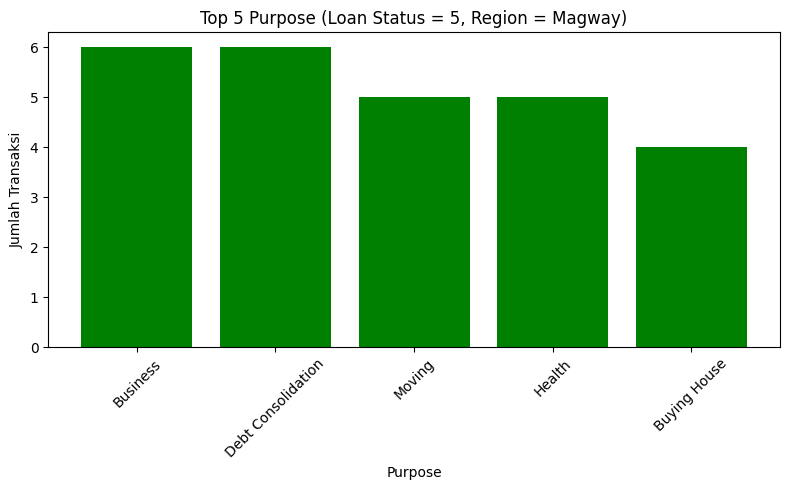

In [ ]:
# Filter data untuk Loan Status = 5 dan Region = 'Magway'
df_status545_magway = df[(df['Loan Status'].isin([5])) & (df['Region'] == 'Magway')]

# Hitung jumlah transaksi per Purpose
top5_occ_status545_magway = (
    df_status545_magway.groupby('Purpose')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(5)
)

print("Top 5 Purpose (Loan Status = 5, Region = Magway):")
print(top5_occ_status545_magway)

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_occ_status545_magway['Purpose'], top5_occ_status545_magway['transaction_count'], color='green')
plt.title("Top 5 Purpose (Loan Status = 5, Region = Magway)")
plt.xlabel("Purpose")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
